### Nasser Hund [Bwinf44 2025](https://bwinf.de/bundeswettbewerb/44/) - A3

[Video](https://youtu.be/dQGTTqowSu0)

<img src='aufgabe.png' width='251'>

#### Beispieldaten

In [ ]:
# Anschauen der Beispieldaten 01-06,0A
nr = '0A'
print(f'Beispiel {nr}:')
f = open(f'beispieldaten/hund{nr}.txt')
print(f.read().strip())
f.close()

Jede Datei enthält einen Plan eines Parks und ist so aufgebaut:

- Zeile1 : Eine ganze Zahl k, die Anzahl der Wege im Park. 
- Folgende k Zeilen: Beschreibung je eines Weges definiert durch die x- und y-Koordinaten seiner Endpunkte.
- In der nächsten Zeile: Eine ganze Zahl s, die Anzahl der Seen im Park.
- Für jeden der s Seen folgen jeweils: 
 Eine Zeile mit der Anzahl n seiner Eckpunkte.
n Zeilen, die die Eckpunkte des Sees der Reihe nach beschreiben. Jede Zeile enthält die x- und y-Koordinate eines Eckpunkts. Die Eckpunkte der Seen werden immer in einer Reihenfolge (z.B. im Uhrzeigersinn) nacheinander angegeben.

Beispieleingabe:

    3
    1 1 6 1
    0 5 7 7
    6 1 7 7
    2
    3
    1 2
    2 5
    0 4
    4
    4 4
    5 2
    6 2
    6 6


In diesem Beispiel gibt es im Park drei Wege. Die Strecke, die den ersten Weg beschreibt, hat den Startpunkt W1s=(1|1) und den Endpunkt W1e=(6|1). Die anderen beiden Wege werden analog durch die Stecken mit den Punkten W2s=(0|5), W2e=(7,7), W3s=(6|1), W3e=(7|7) beschrieben.
Außerdem gibt es im Park zwei Seen. Der erste See hat drei Eckpunkte: S11=(1|2), S12=(2|5) und S13=(0|4). Der zweite See hat vier Eckpunkte: S21=(4|4), S22=(5|2), S23=(6|2) und S24=(6|6).    

Dieses Beispiel habe ich als Eingabe hund0A.txt hinzugefügt

#### Shapely

[Video](https://youtu.be/qlCe7l9ssew)

In [43]:
from shapely.geometry import LineString, Polygon
from shapely import  geometrycollections, shortest_line

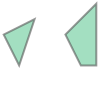

In [44]:
pg1 = Polygon([(1,2),(2,5),(0,4)])
pg2 = Polygon([(4,4), (5,2), (6,2), (6,6)])
geometrycollections([pg1, pg2]) 

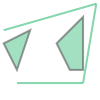

In [45]:
ls1 = LineString([(1, 1), (6, 1)])
ls2 = LineString([(0, 5), (7, 7)])
ls3 = LineString([(6, 1), (7, 7)])
geometrycollections([pg1, pg2, ls1, ls2, ls3]) 

In [46]:
for p in [pg1, pg2]:
    for ls in [ls1, ls2, ls3]:
        print(p.distance(ls))

1.0
0.549442255794756
4.603171644550004
1.0
0.6868028197434451
0.1643989873053573


#### Das ganze Programm

Beispiel 06:
Länge der Leine: 199.573


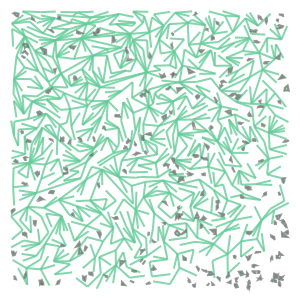

In [52]:
from shapely.geometry import Point, LineString, Polygon
from shapely import  geometrycollections, shortest_line

nr = '06'
print(f'Beispiel {nr}:')
f = open(f'beispieldaten/hund{nr}.txt')
wege = []
seen = []
anzahl_wege = int(f.readline())
for i in range(anzahl_wege):
    sx,sy,ex,ey = [int(x) for x in f.readline().split()]
    wege.append(LineString([(sx,sy),(ex,ey)]))
    
anzahl_seen = int(f.readline()) 
for i in range(anzahl_seen):
    see = []
    anzahl_punkte = int(f.readline())
    for j in range(anzahl_punkte):
        x,y = [int(x) for x in f.readline().split()]
        see.append((x,y))
    seen.append(Polygon(see))
f.close()

best = float('inf')
for w in wege:
    for s in seen:
        if s.distance(w) < best:
            best = s.distance(w)

print(f'Länge der Leine: {best:.3f}')
    
geometrycollections(wege+seen)